# EDA ANALYSIS OF HABERMAN DATASET

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
hm =pd.read_csv("haber.csv")

Import pandas, numpy, robust, seaborn and matplotlib.plot(for data visualisation).

In [2]:
print(hm.shape)
print(hm.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


Haberman Dataset got 306 rows and 4 columns( age, year, nodes, status)

In [3]:
hm.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


Print the last 5 rows from the dataset.

# SCATTER PLOT

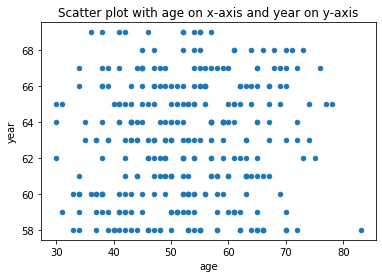

In [4]:
hm.plot(kind='scatter', x='age', y='year') ;
plt.title('Scatter plot with age on x-axis and year on y-axis')
plt.show()


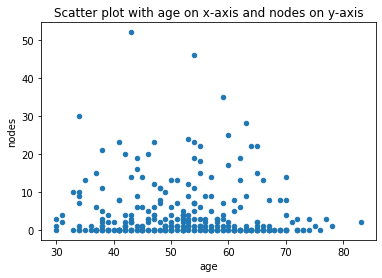

In [5]:
hm.plot(kind='scatter', x='age', y='nodes') ;
plt.title('Scatter plot with age on x-axis and nodes on y-axis')
plt.show()

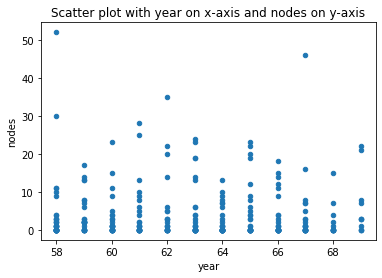

In [6]:
hm.plot(kind='scatter', x='year', y='nodes') ;
plt.title('Scatter plot with year on x-axis and nodes on y-axis')
plt.show()

But, we cannot distinguish between the data with status as 1 or 2. We use seaborn for visualising the data better.

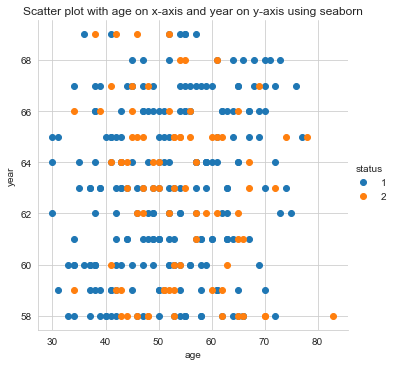

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="status",height=5).map(plt.scatter, "age", "year") .add_legend();
plt.title('Scatter plot with age on x-axis and year on y-axis using seaborn')
plt.show();

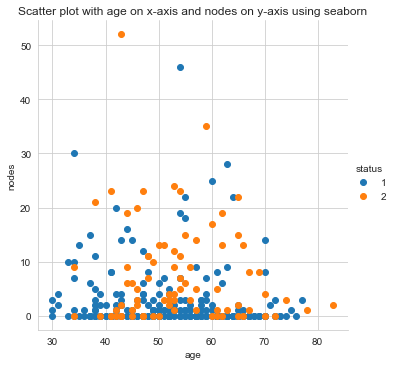

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="status",height=5).map(plt.scatter, "age", "nodes") .add_legend();
plt.title('Scatter plot with age on x-axis and nodes on y-axis using seaborn')
plt.show();

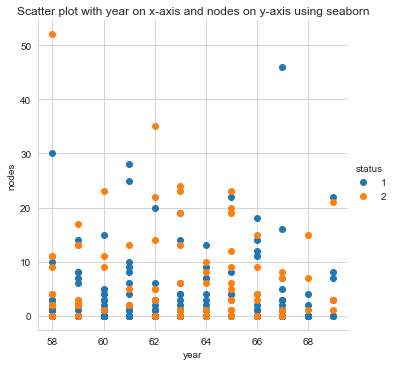

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="status",height=5).map(plt.scatter, "year", "nodes") .add_legend();
plt.title('Scatter plot with year on x-axis and nodes on y-axis using seaborn')
plt.show();

Above three plots are the same as the ones plotted using matplotlib but the two categories in status column is depicted with two different colors using seaborn.

# PAIRPLOT

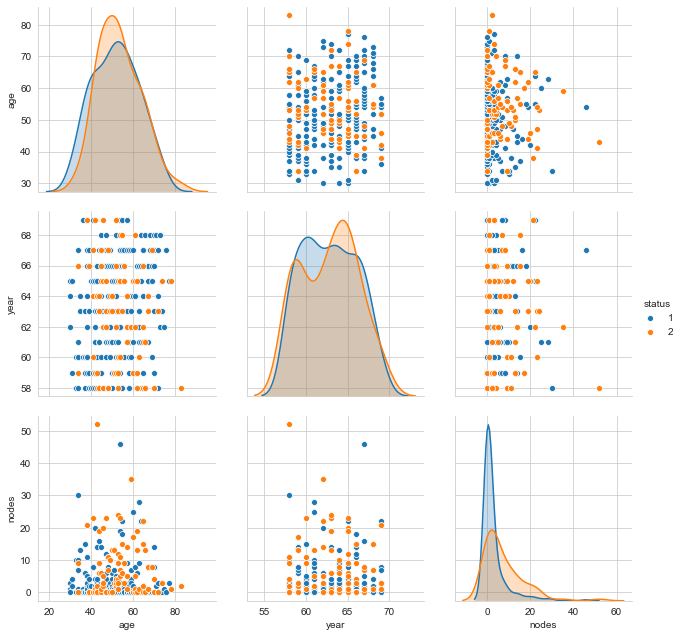

In [10]:
#plt.close();
sns.set_style("whitegrid");
sns.pairplot(hm, hue="status", height=3,vars=['age','year', 'nodes'])
plt.show()

Above ones are the pairplots which is used for better understanding of data, scatter plots individually plots the data. But, in pairplot combination all the columns are plotted combining with other columns. 
Diagonally, histograms of individual columns are plotted.

Survival rate decreases with increase in Axilliary nodes. Other plots doesn't show a understandable seperation.

# 1D PLOT

In [11]:
survival_1 = hm.loc[hm["status"] == 1];
survival_2 = hm.loc[hm["status"] == 2];

Consider survival_1 as patient who survived 5 years or more after the surgery.
survival_2 as patient who survived less than 5 years after the surgery.

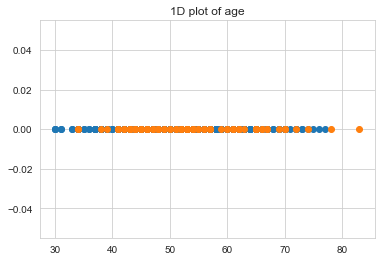

In [12]:
plt.plot(survival_1["age"], np.zeros_like(survival_1['age']), 'o')
plt.plot(survival_2["age"], np.zeros_like(survival_2['age']), 'o')
plt.title('1D plot of age')
plt.show()

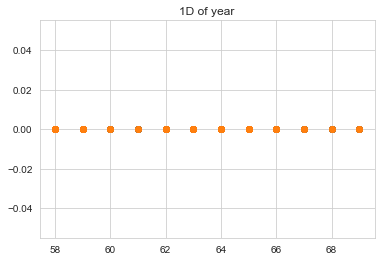

In [13]:
plt.plot(survival_1["year"], np.zeros_like(survival_1['year']), 'o')
plt.plot(survival_2["year"], np.zeros_like(survival_2['year']), 'o')
plt.title('1D of year')
plt.show()

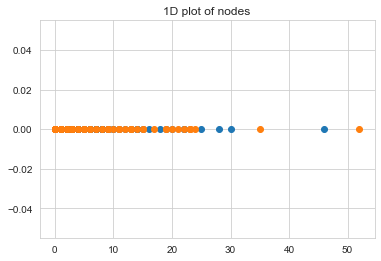

In [14]:
plt.plot(survival_1["nodes"], np.zeros_like(survival_1['nodes']), 'o')
plt.plot(survival_2["nodes"], np.zeros_like(survival_2['nodes']), 'o')
plt.title('1D plot of nodes')
plt.show()

In the above three 1D plots, both the survival status overlaps which makes it hard to seperate and understand.

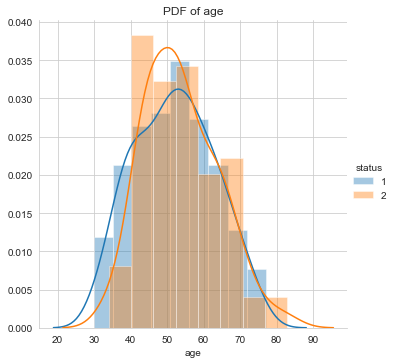

In [15]:
sns.FacetGrid(hm, hue="status", height=5).map(sns.distplot, "age") .add_legend();
plt.title('PDF of age')
plt.show();

Survival rate of more than 5 years and less than 5 years are almost same between 40-60 years. Between 30-40, survival rate of more than 5 years is prevelant. And the same survival rate decreases from 70 years.

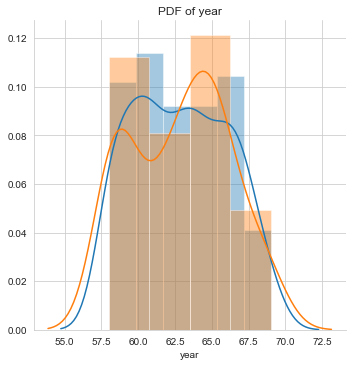

In [16]:
sns.FacetGrid(hm, hue="status", height=5).map(sns.distplot, "year") .add_legend
plt.title('PDF of year')
plt.show();

Survival rate has increased in the years ranging from 1960-1962 and 1966-1967. Survial rate is less in 1963-1966.

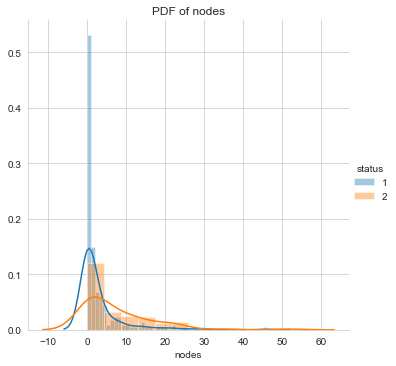

In [17]:
sns.FacetGrid(hm, hue="status", height=5).map(sns.distplot, "nodes") .add_legend();
plt.title('PDF of nodes')
plt.show();

Survival rate is high when Axilliary nodes are very less(0-4), and survival rate decreases exponentially with increase in Axilliary nodes.

[0.06222222 0.14222222 0.15555556 0.18222222 0.19555556 0.14222222
 0.08       0.04      ]
[30.    35.875 41.75  47.625 53.5   59.375 65.25  71.125 77.   ]


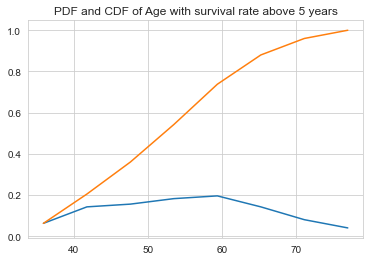

In [18]:
counts, bin_edges = np.histogram(survival_1['age'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of Age with survival rate above 5 years')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.04938272 0.2345679  0.19753086 0.20987654 0.12345679 0.13580247
 0.02469136 0.02469136]
[34.    40.125 46.25  52.375 58.5   64.625 70.75  76.875 83.   ]


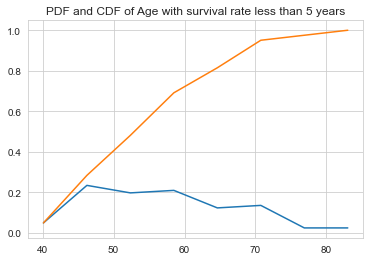

In [19]:
counts, bin_edges = np.histogram(survival_2['age'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of Age with survival rate less than 5 years')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.06222222 0.14222222 0.15555556 0.18222222 0.19555556 0.14222222
 0.08       0.04      ]
[30.    35.875 41.75  47.625 53.5   59.375 65.25  71.125 77.   ]
[0.04938272 0.2345679  0.19753086 0.20987654 0.12345679 0.13580247
 0.02469136 0.02469136]
[34.    40.125 46.25  52.375 58.5   64.625 70.75  76.875 83.   ]


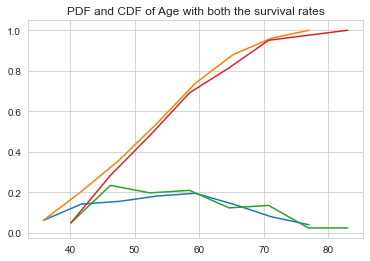

In [20]:
counts, bin_edges = np.histogram(survival_1['age'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(survival_2['age'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of Age with both the survival rates')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

CDF of Age is plotted above, orange representing survival rate above 5 years and red representing survival rate less than 5 years. 
Through the above plot, both the orange and red lines are almost overlapping which makes it difficult to distinguish.

[0.18666667 0.10666667 0.17333333 0.09777778 0.10222222 0.16444444
 0.09333333 0.07555556]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]


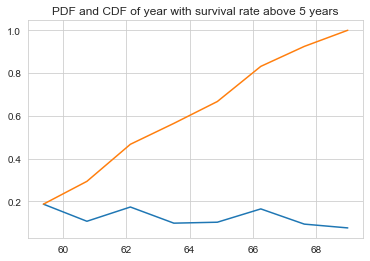

In [21]:
counts, bin_edges = np.histogram(survival_1['year'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of year with survival rate above 5 years')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.25925926 0.04938272 0.12345679 0.09876543 0.09876543 0.2345679
 0.04938272 0.08641975]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]


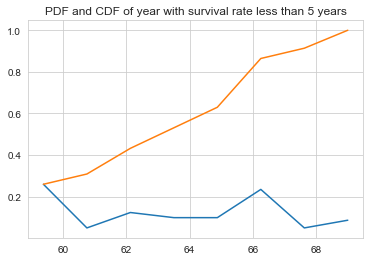

In [22]:
counts, bin_edges = np.histogram(survival_2['year'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.title('PDF and CDF of year with survival rate less than 5 years')
plt.plot(bin_edges[1:], cdf)

[0.18666667 0.10666667 0.17333333 0.09777778 0.10222222 0.16444444
 0.09333333 0.07555556]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]
[0.25925926 0.04938272 0.12345679 0.09876543 0.09876543 0.2345679
 0.04938272 0.08641975]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]


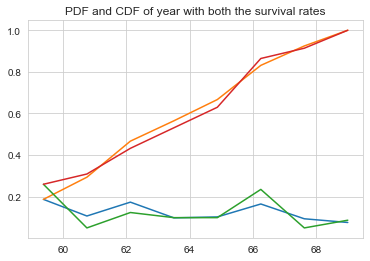

In [23]:
counts, bin_edges = np.histogram(survival_1['year'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(survival_2['year'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of year with both the survival rates')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

CDF's of Year. 
Here, both the orange and red lines too overlap with each other.

[0.84444444 0.08444444 0.03111111 0.02222222 0.00888889 0.00444444
 0.         0.00444444]
[ 0.    5.75 11.5  17.25 23.   28.75 34.5  40.25 46.  ]


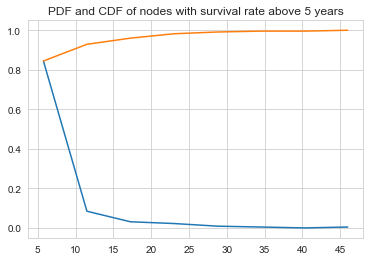

In [24]:
counts, bin_edges = np.histogram(survival_1['nodes'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of nodes with survival rate above 5 years')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.60493827 0.16049383 0.12345679 0.08641975 0.         0.01234568
 0.         0.01234568]
[ 0.   6.5 13.  19.5 26.  32.5 39.  45.5 52. ]


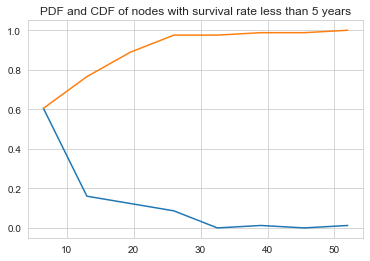

In [25]:
counts, bin_edges = np.histogram(survival_2['nodes'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of nodes with survival rate less than 5 years')
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.84444444 0.08444444 0.03111111 0.02222222 0.00888889 0.00444444
 0.         0.00444444]
[ 0.    5.75 11.5  17.25 23.   28.75 34.5  40.25 46.  ]
[0.60493827 0.16049383 0.12345679 0.08641975 0.         0.01234568
 0.         0.01234568]
[ 0.   6.5 13.  19.5 26.  32.5 39.  45.5 52. ]


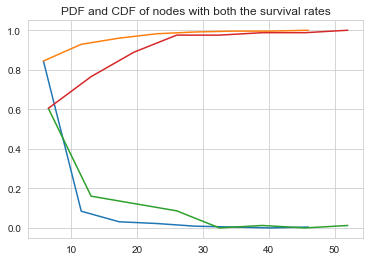

In [26]:
counts, bin_edges = np.histogram(survival_1['nodes'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(survival_2['nodes'],bins=8,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of nodes with both the survival rates')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

CDF's of Axilliary nodes, percentage of people with more survival rate is nearly 82 compared to short survival rate which is nearly 60 when Axilliary nodes are less than 10. 
When Axilliary nodes are more than 40, short survival rate is 100%.

In [27]:
a=np.mean(survival_1["age"])
b=np.mean(survival_2["age"])
a_1=np.mean(np.append(survival_1["age"],50)) 
b_1=np.mean(np.append(survival_2["age"],50))
print("Mean of age:",a,b)
print("Mean of age with outliers:",a_1,b_1)

c=np.mean(survival_1["year"])
d=np.mean(survival_2["year"])
print("Mean of Year:",c,d)

e=np.mean(survival_1["nodes"])
f=np.mean(survival_2["nodes"])
e_1=np.mean(np.append(survival_1["nodes"],50)) 
print("Mean of Year:",e,f)
print("Mean of age with outlier:",e_1)


Mean of age: 52.01777777777778 53.67901234567901
Mean of age with outliers: 52.008849557522126 53.63414634146341
Mean of Year: 62.86222222222222 62.82716049382716
Mean of Year: 2.7911111111111113 7.45679012345679
Mean of age with outlier: 3.0


Means of age with and without outliers are almost same.
But in the case of Axilliary nodes, even after adding outlier, the mean didn't change much in the case of survival_1.
In survival_2, the mean is 7.45, which depicts that the probablity for survival less than 5 years is more than the other. 

In [28]:
std_age1=np.std(survival_1["age"])
std_age2=np.std(survival_2["age"])
print("std of age:",std_age1,std_age2)

std_year1=np.std(survival_1["year"])
std_year2=np.std(survival_2["year"])
print("std of year:",std_year1,std_year2)

std_nodes1=np.std(survival_1["nodes"])
std_nodes2=np.std(survival_2["nodes"])
print("std of nodes:",std_nodes1,std_nodes2)

std of age: 10.98765547510051 10.10418219303131
std of year: 3.2157452144021956 3.3214236255207883
std of nodes: 5.857258449412131 9.128776076761632


In the case of Age and year, standard deviations of survival above 5 years and less than 5 years are almost similar so they are evenly arranged.
But, in the case of Axilliary nodes, spread of data for survival less than 5 years is more compared to the data related to survival rate more than 5 years.

In [29]:
med_age1=np.median(survival_1["age"])
med_age2=np.median(survival_2["age"])
print("Median of age:",med_age1,med_age2)

med_year1=np.median(survival_1["year"])
med_year2=np.median(survival_2["year"])
print("Median of year:",med_year1,med_year2)

med_nodes1=np.median(survival_1["nodes"])
med_nodes2=np.median(survival_2["nodes"])
print("Median of nodes:",med_nodes1,med_nodes2)

Median of age: 52.0 53.0
Median of year: 63.0 63.0
Median of nodes: 0.0 4.0


Median of Age and Year are similar, whereas Median of nodes with respect to survival status differ which is 0 for survival more than 5 years and 4 for survival less than 5 years.

In [30]:
quan_age1=np.percentile(survival_1["age"],np.arange(0, 100, 25))
quan_age2=np.percentile(survival_2["age"],np.arange(0, 100, 25))
print("Quantiles of age:",quan_age1,quan_age2)

quan_year1=np.percentile(survival_1["year"],np.arange(0, 100, 25))
quan_year2=np.percentile(survival_2["year"],np.arange(0, 100, 25))
print("Quantiles of year:",quan_year1,quan_year2)

quan_nodes1=np.percentile(survival_1["nodes"],np.arange(0, 100, 25))
quan_nodes2=np.percentile(survival_2["nodes"],np.arange(0, 100, 25))
print("Quantiles of nodes:",quan_nodes1,quan_nodes2)

Quantiles of age: [30. 43. 52. 60.] [34. 46. 53. 61.]
Quantiles of year: [58. 60. 63. 66.] [58. 59. 63. 65.]
Quantiles of nodes: [0. 0. 0. 3.] [ 0.  1.  4. 11.]


From Quantiles, we can see that 50% of nodes are 0, and 75% of nodes are less than 3 with respect to survival more than 5 years.
And, 75% of patients have minimum of 11 nodes which are detected where survival is less than 5 years.

In [31]:
MAD_age1=robust.mad(survival_1["age"])
MAD_age2=robust.mad(survival_2["age"])
print("Mean Absoluted Deviation of age",MAD_age1,MAD_age2)

MAD_year1=robust.mad(survival_1["year"])
MAD_year2=robust.mad(survival_2["year"])
print("Mean Absoluted Deviation of year",MAD_year1,MAD_year2)

MAD_nodes1=robust.mad(survival_1["nodes"])
MAD_nodes2=robust.mad(survival_2["nodes"])
print("Mean Absoluted Deviation of nodes",MAD_nodes1,MAD_nodes2)


Mean Absoluted Deviation of age 13.343419966550417 11.860817748044816
Mean Absoluted Deviation of year 4.447806655516806 4.447806655516806
Mean Absoluted Deviation of nodes 0.0 5.930408874022408


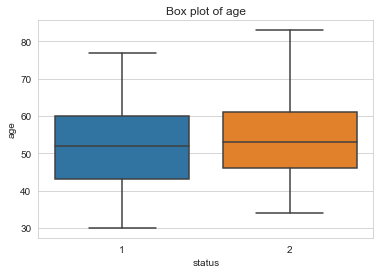

In [32]:
sns.boxplot(x='status',y='age', data=hm)
plt.title('Box plot of age')
plt.show()

Box plots represent quantiles in box, ranging from 25- 75%. 
25, 50 and 75th percentile for both the survival status are nearly equal.

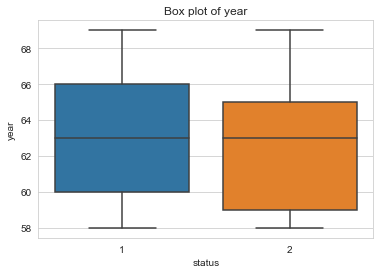

In [33]:
sns.boxplot(x='status',y='year', data=hm)
plt.title('Box plot of year')
plt.show()

Here, 50th percentile is similar but there is an year difference in 25th and 75th percentiles for both the survival status.

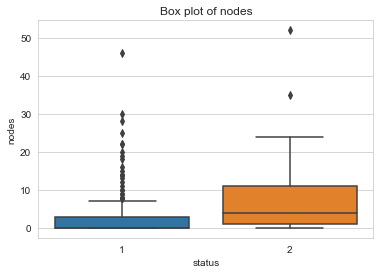

In [34]:
sns.boxplot(x='status',y='nodes', data=hm)
plt.title('Box plot of nodes')
plt.show()

In the above box plots, 25th percentile and 50th percentile are nearly same for survival status more than 5 years and threshold is 0 to 7. 
75th percentile is 12 and 25th percentile is 1 when it comes to survival rate less than 5 years and threshold is 0-25. 
Most of the points lie above 12 in the survival rate less than 5 years.

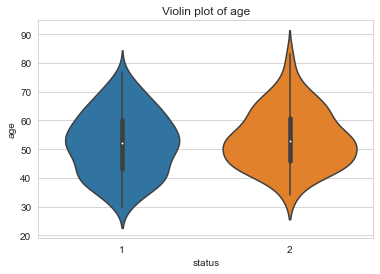

In [35]:
sns.violinplot(x="status", y="age", data=hm, size=10)
plt.title('Violin plot of age')
plt.show()

Violin is a combination of histogram, pdf and box plots. Black line inside the violin plot is the box plot with the white mark being the 50th percentile.
PDF's around the black line looks similar in both the plots.

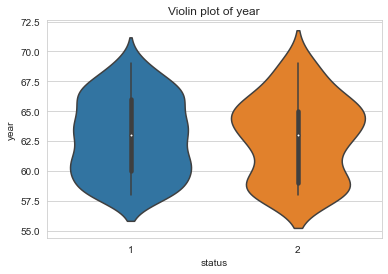

In [36]:
sns.violinplot(x="status", y="year", data=hm, size=10)
plt.title('Violin plot of year')
plt.show()

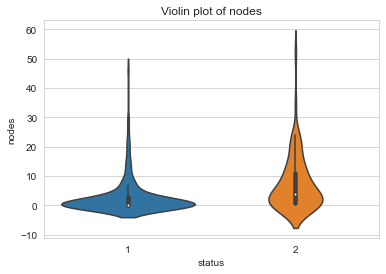

In [37]:
sns.violinplot(x="status", y="nodes", data=hm, size=10)
plt.title('Violin plot of nodes')
plt.show()

In the above plots, pdf of plot 1 is different from the plot 2 with higher number of points being in the range 0-4.